<a href="https://colab.research.google.com/github/LonghuaHu/deep-learning/blob/master/Comparison_using_full_mnist_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
from shutil import copyfileobj
from six.moves import urllib
from sklearn.datasets.base import get_data_home
import os
 
def fetch_mnist(data_home=None):
    mnist_alternative_url = "https://github.com/amplab/datascience-sp14/raw/master/lab7/mldata/mnist-original.mat"
    data_home = get_data_home(data_home=data_home)
    data_home = os.path.join(data_home, 'mldata')
    if not os.path.exists(data_home):
        os.makedirs(data_home)
    mnist_save_path = os.path.join(data_home, "mnist-original.mat")
    if not os.path.exists(mnist_save_path):
        mnist_url = urllib.request.urlopen(mnist_alternative_url)
        with open(mnist_save_path, "wb") as matlab_file:
            copyfileobj(mnist_url, matlab_file)
 
fetch_mnist()
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata("MNIST original")

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


In [3]:
import tensorflow as tf
import numpy as np
type(mnist)

sklearn.utils.Bunch

In [4]:
print(mnist.values())

dict_values(['mldata.org dataset: mnist-original', ['label', 'data'], array([0., 0., 0., ..., 9., 9., 9.]), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)])


In [5]:
for key, value in mnist.items():
  print('val', value)

val mldata.org dataset: mnist-original
val ['label', 'data']
val [0. 0. 0. ... 9. 9. 9.]
val [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [0]:
listlabel = list(list(mnist.items())[2])
listvalues = list(list(mnist.items())[3])

In [7]:
listlabel

['target', array([0., 0., 0., ..., 9., 9., 9.])]

In [0]:
y = listlabel[1]

In [9]:
type(y)

numpy.ndarray

In [10]:
y.astype(int)

array([0, 0, 0, ..., 9, 9, 9])

In [11]:
y.shape

(70000,)

In [0]:
X = listvalues[1].reshape(70000, 28, 28, 1)

In [13]:
X.shape

(70000, 28, 28, 1)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42)
X_train = X_train / 255.0
X_test = X_test / 255.0

In [15]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(56000, 28, 28, 1) (14000, 28, 28, 1) (56000,) (14000,)


In [33]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(8, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 8)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 11, 11, 16)        1168      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               51328     
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1290      
Total para

In [34]:
history_cnn_2c2p = model.fit(X_train, y_train, epochs=20)
test_loss = model.evaluate(X_test, y_test)

Epoch 1/20
56000/56000 [==============================] - 8s 141us/sample - loss: 0.1899 - acc: 0.9434
Epoch 2/20
56000/56000 [==============================] - 8s 136us/sample - loss: 0.0578 - acc: 0.9821
Epoch 3/20
56000/56000 [==============================] - 8s 136us/sample - loss: 0.0417 - acc: 0.9870
Epoch 4/20
56000/56000 [==============================] - 8s 136us/sample - loss: 0.0316 - acc: 0.9898
Epoch 5/20
56000/56000 [==============================] - 8s 136us/sample - loss: 0.0252 - acc: 0.9919
Epoch 6/20
56000/56000 [==============================] - 8s 136us/sample - loss: 0.0199 - acc: 0.9932
Epoch 7/20
56000/56000 [==============================] - 8s 137us/sample - loss: 0.0164 - acc: 0.9947
Epoch 8/20
56000/56000 [==============================] - 8s 136us/sample - loss: 0.0136 - acc: 0.9952
Epoch 9/20
56000/56000 [==============================] - 8s 139us/sample - loss: 0.0112 - acc: 0.9961
Epoch 10/20
56000/56000 [==============================] - 9s 155us/sampl

In [35]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(8, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 26, 26, 8)         80        
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 24, 24, 16)        1168      
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 22, 22, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 3872)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)               495744    
_________________________________________________________________
dense_15 (Dense)             (None, 10)                1290      
Total para

In [36]:
history_cnn_3c1p = model.fit(X_train, y_train, epochs=20)
test_loss = model.evaluate(X_test, y_test)

Epoch 1/20
56000/56000 [==============================] - 9s 159us/sample - loss: 0.1275 - acc: 0.9617
Epoch 2/20
56000/56000 [==============================] - 9s 152us/sample - loss: 0.0398 - acc: 0.9877
Epoch 3/20
56000/56000 [==============================] - 8s 151us/sample - loss: 0.0259 - acc: 0.9917
Epoch 4/20
56000/56000 [==============================] - 8s 152us/sample - loss: 0.0172 - acc: 0.9947
Epoch 5/20
56000/56000 [==============================] - 8s 152us/sample - loss: 0.0136 - acc: 0.9957
Epoch 6/20
56000/56000 [==============================] - 9s 152us/sample - loss: 0.0100 - acc: 0.9965
Epoch 7/20
56000/56000 [==============================] - 9s 154us/sample - loss: 0.0087 - acc: 0.9967
Epoch 8/20
56000/56000 [==============================] - 10s 174us/sample - loss: 0.0072 - acc: 0.9975
Epoch 9/20
56000/56000 [==============================] - 9s 152us/sample - loss: 0.0059 - acc: 0.9981
Epoch 10/20
56000/56000 [==============================] - 8s 151us/samp

In [20]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(8, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(tf.keras.layers.Conv2D(16, (3,3), activation='relu'))
model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
#model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu'))
#model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
#model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.BatchNormalization())


#FC Layers
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 16)        1168      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 22, 22, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
batch_normalization_v1 (Batc (None, 11, 11, 32)        128       
_________________________________________________________________
flatten_2 (Flatten)          (None, 3872)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               495744    
__________

In [21]:
history_cnn_3c1p = model.fit(X_train, y_train, epochs=20)
test_loss = model.evaluate(X_test, y_test)

Epoch 1/20
56000/56000 [==============================] - 9s 169us/sample - loss: 0.0997 - acc: 0.9694
Epoch 2/20
56000/56000 [==============================] - 9s 164us/sample - loss: 0.0389 - acc: 0.9882
Epoch 3/20
56000/56000 [==============================] - 9s 164us/sample - loss: 0.0274 - acc: 0.9912
Epoch 4/20
56000/56000 [==============================] - 9s 164us/sample - loss: 0.0194 - acc: 0.9941
Epoch 5/20
56000/56000 [==============================] - 9s 164us/sample - loss: 0.0183 - acc: 0.9951
Epoch 6/20
56000/56000 [==============================] - 9s 164us/sample - loss: 0.0128 - acc: 0.9963
Epoch 7/20
56000/56000 [==============================] - 10s 183us/sample - loss: 0.0129 - acc: 0.9959
Epoch 8/20
56000/56000 [==============================] - 9s 169us/sample - loss: 0.0113 - acc: 0.9964
Epoch 9/20
56000/56000 [==============================] - 9s 163us/sample - loss: 0.0081 - acc: 0.9976
Epoch 10/20
56000/56000 [==============================] - 11s 188us/sam

In [22]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(8, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(tf.keras.layers.Conv2D(16, (3,3), activation='relu'))
model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
#model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu'))
#model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
#model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.BatchNormalization())


#FC Layers
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 24, 24, 16)        1168      
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 22, 22, 32)        4640      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 20, 20, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
batch_normalization_v1_1 (Ba (None, 10, 10, 32)        128       
_________________________________________________________________
flatten_3 (Flatten)          (None, 3200)              0         
__________

In [23]:
history_cnn_4c1p = model.fit(X_train, y_train, epochs=20)
test_loss = model.evaluate(X_test, y_test)

Epoch 1/20
56000/56000 [==============================] - 10s 185us/sample - loss: 0.0982 - acc: 0.9697
Epoch 2/20
56000/56000 [==============================] - 11s 200us/sample - loss: 0.0405 - acc: 0.9874
Epoch 3/20
56000/56000 [==============================] - 10s 185us/sample - loss: 0.0290 - acc: 0.9906
Epoch 4/20
56000/56000 [==============================] - 10s 182us/sample - loss: 0.0217 - acc: 0.9932
Epoch 5/20
56000/56000 [==============================] - 10s 181us/sample - loss: 0.0171 - acc: 0.9948
Epoch 6/20
56000/56000 [==============================] - 10s 181us/sample - loss: 0.0150 - acc: 0.9954
Epoch 7/20
56000/56000 [==============================] - 10s 181us/sample - loss: 0.0129 - acc: 0.9959
Epoch 8/20
56000/56000 [==============================] - 10s 182us/sample - loss: 0.0086 - acc: 0.9972
Epoch 9/20
56000/56000 [==============================] - 10s 182us/sample - loss: 0.0114 - acc: 0.9966
Epoch 10/20
56000/56000 [==============================] - 11s 2

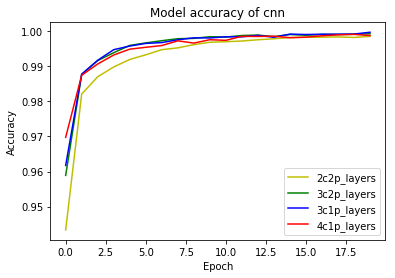

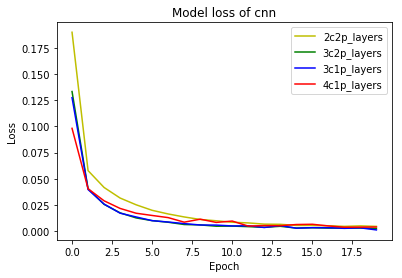

In [37]:
import matplotlib.pyplot as plt
# Plot training accuracy values
plt.plot(history_cnn_2c2p.history['acc'], color='y', label='2c2p_layers')
plt.plot(history_cnn_3c2p.history['acc'], color='green', label='3c2p_layers')
plt.plot(history_cnn_3c1p.history['acc'], color='blue', label='3c1p_layers')
plt.plot(history_cnn_4c1p.history['acc'], color='red', label='4c1p_layers')
plt.title('Model accuracy of cnn')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot training loss values
plt.plot(history_cnn_2c2p.history['loss'], color='y', label='2c2p_layers')
plt.plot(history_cnn_3c2p.history['loss'], color='green', label='3c2p_layers')
plt.plot(history_cnn_3c1p.history['loss'], color='blue', label='3c1p_layers')
plt.plot(history_cnn_4c1p.history['loss'], color='red', label='4c1p_layers')
plt.title('Model loss of cnn')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()




# QCNN

In [26]:
import numpy as np
from sklearn.model_selection import train_test_split
import h5py 
#data
f = h5py.File('/content/drive/My Drive/Colab Notebooks/quatFullMnist.mat','r') 

X_q = f['quatFullMnist'][:]
#data = data.T
print(X_q.shape)

#lable
f = h5py.File('/content/drive/My Drive/Colab Notebooks/quatFullMnistLabel.mat','r') 
y_q = f['quatFullMnistLabel'][:]
y_q = y_q.T
print(y_q.shape)




(70000, 12, 14, 14)
(70000, 1)


In [0]:
X_train_q, X_test_q, y_train_q, y_test_q = train_test_split(
X_q, y_q, test_size=0.2, random_state=42)

In [28]:
X_train_q = X_train_q.reshape(X_train_q.shape[0], X_train_q.shape[1], X_train_q.shape[2], X_train_q.shape[3],1)
X_test_q = X_test_q.reshape(X_test_q.shape[0], X_train_q.shape[1], X_train_q.shape[2], X_train_q.shape[3],1)
#training_labels = training_labels[0]
y_train_q.astype(int)
y_test_q.astype(int)
print('Number of training examples: ' + str(X_train_q.shape[0]))
print('Training images shape:' + str(X_train_q.shape))
print('Training labels shape:' + str(y_train_q.shape))
print('Test images shape:' + str(X_test_q.shape))
print('Test labels shape:' + str(y_test_q.shape))

Number of training examples: 56000
Training images shape:(56000, 12, 14, 14, 1)
Training labels shape:(56000, 1)
Test images shape:(14000, 12, 14, 14, 1)
Test labels shape:(14000, 1)


## 3 conv layers, 1 pooling layer

In [29]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv3D(8, (1,3,3), activation='relu', input_shape=(12, 14, 14, 1)))
#model.add(tf.keras.layers.MaxPooling3D(pool_size=(2, 2, 2), strides=(1, 2, 2)))
#model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv3D(16, (1,3,3), activation='relu'))
model.add(tf.keras.layers.Conv3D(32, (1,3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling3D(pool_size=(1, 2, 2), strides=(1, 2, 2)))
model.add(tf.keras.layers.BatchNormalization())


#FC Layers
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d (Conv3D)              (None, 12, 12, 12, 8)     80        
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 12, 10, 10, 16)    1168      
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 12, 8, 8, 32)      4640      
_________________________________________________________________
max_pooling3d (MaxPooling3D) (None, 12, 4, 4, 32)      0         
_________________________________________________________________
batch_normalization_v1_2 (Ba (None, 12, 4, 4, 32)      128       
_________________________________________________________________
flatten_4 (Flatten)          (None, 6144)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               786560    
__________

In [30]:
history_qcnn_3c1p = model.fit(X_train_q, y_train_q, epochs=20)
test_loss = model.evaluate(X_test_q, y_test_q)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
56000/56000 [==============================] - 13s 239us/sample - loss: 0.1757 - acc: 0.9473
Epoch 2/20
56000/56000 [==============================] - 13s 230us/sample - loss: 0.0638 - acc: 0.9797
Epoch 3/20
56000/56000 [==============================] - 13s 230us/sample - loss: 0.0365 - acc: 0.9879
Epoch 4/20
56000/56000 [==============================] - 13s 232us/sample - loss: 0.0292 - acc: 0.9910
Epoch 5/20
56000/56000 [==============================] - 13s 231us/sample - loss: 0.0246 - acc: 0.9920
Epoch 6/20
56000/56000 [==============================] - 14s 241us/sample - loss: 0.0177 - acc: 0.9945
Epoch 7/20
56000/56000 [==============================] - 13s 236us/sample - loss: 0.0188 - acc: 0.9944
Epoch 8/20
56000/56000 [==============================] - 13s 230us/sample - loss: 0.0138 - acc: 0.9961
Epoch 9/20
56000/56000 [==============================] - 13s 231us/sample - loss: 0.0123 - acc: 0.9963
Epoch 10/20
5600

## 4 conv layers, 1 pooling layer

In [31]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv3D(8, (1,3,3), activation='relu', input_shape=(12, 14, 14, 1)))
#model.add(tf.keras.layers.MaxPooling3D(pool_size=(2, 2, 2), strides=(1, 2, 2)))
#model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv3D(16, (1,3,3), activation='relu'))
model.add(tf.keras.layers.Conv3D(32, (1,3,3), activation='relu'))
model.add(tf.keras.layers.Conv3D(32, (1,3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling3D(pool_size=(1, 2, 2), strides=(1, 2, 2)))
model.add(tf.keras.layers.BatchNormalization())


#FC Layers
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_3 (Conv3D)            (None, 12, 12, 12, 8)     80        
_________________________________________________________________
conv3d_4 (Conv3D)            (None, 12, 10, 10, 16)    1168      
_________________________________________________________________
conv3d_5 (Conv3D)            (None, 12, 8, 8, 32)      4640      
_________________________________________________________________
conv3d_6 (Conv3D)            (None, 12, 6, 6, 32)      9248      
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 12, 3, 3, 32)      0         
_________________________________________________________________
batch_normalization_v1_3 (Ba (None, 12, 3, 3, 32)      128       
_________________________________________________________________
flatten_5 (Flatten)          (None, 3456)              0         
__________

In [32]:
history_qcnn_4c1p = model.fit(X_train_q, y_train_q, epochs=20)
test_loss = model.evaluate(X_test_q, y_test_q)

Epoch 1/20
56000/56000 [==============================] - 15s 261us/sample - loss: 0.1802 - acc: 0.9441
Epoch 2/20
56000/56000 [==============================] - 14s 253us/sample - loss: 0.0796 - acc: 0.9754
Epoch 3/20
56000/56000 [==============================] - 15s 269us/sample - loss: 0.0503 - acc: 0.9837
Epoch 4/20
56000/56000 [==============================] - 14s 252us/sample - loss: 0.0375 - acc: 0.9879
Epoch 5/20
56000/56000 [==============================] - 14s 253us/sample - loss: 0.0280 - acc: 0.9906
Epoch 6/20
56000/56000 [==============================] - 14s 252us/sample - loss: 0.0228 - acc: 0.9926
Epoch 7/20
56000/56000 [==============================] - 14s 252us/sample - loss: 0.0173 - acc: 0.9945
Epoch 8/20
56000/56000 [==============================] - 14s 255us/sample - loss: 0.0187 - acc: 0.9936
Epoch 9/20
56000/56000 [==============================] - 15s 268us/sample - loss: 0.0155 - acc: 0.9951
Epoch 10/20
56000/56000 [==============================] - 14s 2

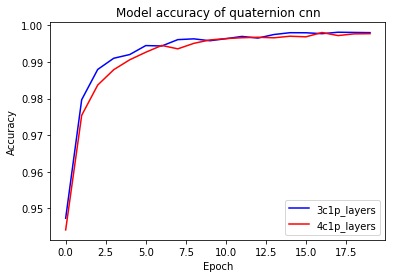

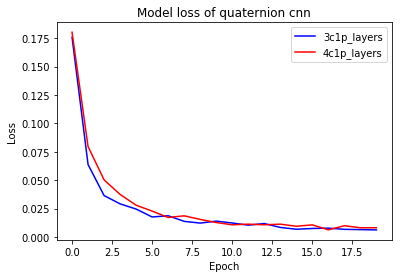

In [38]:
import matplotlib.pyplot as plt
# Plot training accuracy values
#plt.plot(history_qcnn_3c2p.history['acc'], color='green', label='3c2p_layers')
plt.plot(history_qcnn_3c1p.history['acc'], color='blue', label='3c1p_layers')
plt.plot(history_qcnn_4c1p.history['acc'], color='red', label='4c1p_layers')
plt.title('Model accuracy of quaternion cnn')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot training loss values
#plt.plot(history_cnn_3c2p.history['loss'], color='green', label='3c2p_layers')
plt.plot(history_qcnn_3c1p.history['loss'], color='blue', label='3c1p_layers')
plt.plot(history_qcnn_4c1p.history['loss'], color='red', label='4c1p_layers')
plt.title('Model loss of quaternion cnn')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()




# WCNN

In [39]:
f = h5py.File('/content/drive/My Drive/Colab Notebooks/waveletFull.mat','r') 

X_w = f['waveletImages'][:]
print(X_w.shape)

#lable
f = h5py.File('/content/drive/My Drive/Colab Notebooks/waveletFullLabels.mat','r') 
y_w = f['waveletImagesLabels'][:]
y_w = y_w.T
print(y_w.shape)

(70000, 4, 14, 14)
(70000, 1)


In [0]:
X_train_w, X_test_w, y_train_w, y_test_w = train_test_split(
X_w, y_w, test_size=0.2, random_state=42)

In [41]:
X_train_w = X_train_w.reshape(X_train_w.shape[0], X_train_w.shape[1], X_train_w.shape[2], X_train_w.shape[3],1)
X_test_w = X_test_w.reshape(X_test_w.shape[0], X_train_w.shape[1], X_train_w.shape[2], X_train_w.shape[3],1)
#training_labels = training_labels[0]
y_train_w.astype(int)
y_test_w.astype(int)
print('Number of training examples: ' + str(X_train_w.shape[0]))
print('Training images shape:' + str(X_train_w.shape))
print('Training labels shape:' + str(y_train_w.shape))
print('Test images shape:' + str(X_test_w.shape))
print('Test labels shape:' + str(y_test_w.shape))

Number of training examples: 56000
Training images shape:(56000, 4, 14, 14, 1)
Training labels shape:(56000, 1)
Test images shape:(14000, 4, 14, 14, 1)
Test labels shape:(14000, 1)


## 3 conv layers, 1 pooling

In [47]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv3D(8, (1,3,3), activation='relu', input_shape=(4, 14, 14, 1)))
#model.add(tf.keras.layers.MaxPooling3D(pool_size=(2, 2, 2), strides=(1, 2, 2)))
#model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv3D(16, (1,3,3), activation='relu'))
model.add(tf.keras.layers.Conv3D(32, (1,3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling3D(pool_size=(1, 2, 2), strides=(1, 2, 2)))
model.add(tf.keras.layers.BatchNormalization())


#FC Layers
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_13 (Conv3D)           (None, 4, 12, 12, 8)      80        
_________________________________________________________________
conv3d_14 (Conv3D)           (None, 4, 10, 10, 16)     1168      
_________________________________________________________________
conv3d_15 (Conv3D)           (None, 4, 8, 8, 32)       4640      
_________________________________________________________________
max_pooling3d_4 (MaxPooling3 (None, 4, 4, 4, 32)       0         
_________________________________________________________________
batch_normalization_v1_6 (Ba (None, 4, 4, 4, 32)       128       
_________________________________________________________________
flatten_10 (Flatten)         (None, 2048)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 128)               262272    
__________

In [48]:
history_wcnn_3c1p = model.fit(X_train_w, y_train_w, epochs=20, verbose=1)
test_loss = model.evaluate(X_test_w, y_test_w)

Epoch 1/20
56000/56000 [==============================] - 12s 214us/sample - loss: 0.1164 - acc: 0.9644
Epoch 2/20
56000/56000 [==============================] - 12s 221us/sample - loss: 0.0432 - acc: 0.9861
Epoch 3/20
56000/56000 [==============================] - 12s 212us/sample - loss: 0.0286 - acc: 0.9906
Epoch 4/20
56000/56000 [==============================] - 12s 206us/sample - loss: 0.0188 - acc: 0.9941
Epoch 5/20
56000/56000 [==============================] - 13s 235us/sample - loss: 0.0155 - acc: 0.9949
Epoch 6/20
56000/56000 [==============================] - 12s 206us/sample - loss: 0.0140 - acc: 0.9952
Epoch 7/20
56000/56000 [==============================] - 11s 205us/sample - loss: 0.0125 - acc: 0.9961
Epoch 8/20
56000/56000 [==============================] - 12s 206us/sample - loss: 0.0098 - acc: 0.9968
Epoch 9/20
56000/56000 [==============================] - 13s 228us/sample - loss: 0.0114 - acc: 0.9966
Epoch 10/20
56000/56000 [==============================] - 12s 2

## 4 conv layers, 1 pooling

In [49]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv3D(8, (1,3,3), activation='relu', input_shape=(4, 14, 14, 1)))
#model.add(tf.keras.layers.MaxPooling3D(pool_size=(2, 2, 2), strides=(1, 2, 2)))
#model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv3D(16, (1,3,3), activation='relu'))
model.add(tf.keras.layers.Conv3D(32, (1,3,3), activation='relu'))
model.add(tf.keras.layers.Conv3D(32, (1,3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling3D(pool_size=(1, 2, 2), strides=(1, 2, 2)))
model.add(tf.keras.layers.BatchNormalization())


#FC Layers
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_16 (Conv3D)           (None, 4, 12, 12, 8)      80        
_________________________________________________________________
conv3d_17 (Conv3D)           (None, 4, 10, 10, 16)     1168      
_________________________________________________________________
conv3d_18 (Conv3D)           (None, 4, 8, 8, 32)       4640      
_________________________________________________________________
conv3d_19 (Conv3D)           (None, 4, 6, 6, 32)       9248      
_________________________________________________________________
max_pooling3d_5 (MaxPooling3 (None, 4, 3, 3, 32)       0         
_________________________________________________________________
batch_normalization_v1_7 (Ba (None, 4, 3, 3, 32)       128       
_________________________________________________________________
flatten_11 (Flatten)         (None, 1152)              0         
__________

In [50]:
history_wcnn_4c1p = model.fit(X_train_w, y_train_w, epochs=20, verbose=1)
test_loss = model.evaluate(X_test_w, y_test_w)

Epoch 1/20
56000/56000 [==============================] - 14s 245us/sample - loss: 0.1332 - acc: 0.9591
Epoch 2/20
56000/56000 [==============================] - 12s 221us/sample - loss: 0.0538 - acc: 0.9829
Epoch 3/20
56000/56000 [==============================] - 12s 222us/sample - loss: 0.0375 - acc: 0.9882
Epoch 4/20
56000/56000 [==============================] - 12s 223us/sample - loss: 0.0276 - acc: 0.9913
Epoch 5/20
56000/56000 [==============================] - 13s 239us/sample - loss: 0.0233 - acc: 0.9925
Epoch 6/20
56000/56000 [==============================] - 13s 226us/sample - loss: 0.0180 - acc: 0.9942
Epoch 7/20
56000/56000 [==============================] - 13s 225us/sample - loss: 0.0136 - acc: 0.9956
Epoch 8/20
56000/56000 [==============================] - 12s 221us/sample - loss: 0.0144 - acc: 0.9951
Epoch 9/20
56000/56000 [==============================] - 12s 222us/sample - loss: 0.0119 - acc: 0.9962
Epoch 10/20
56000/56000 [==============================] - 12s 2

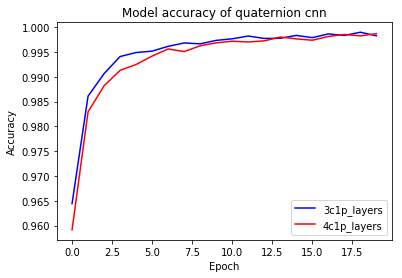

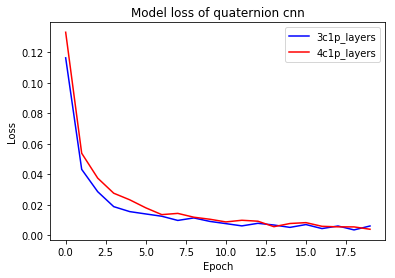

In [51]:
import matplotlib.pyplot as plt
# Plot training accuracy values
#plt.plot(history_qcnn_3c2p.history['acc'], color='green', label='3c2p_layers')
plt.plot(history_wcnn_3c1p.history['acc'], color='blue', label='3c1p_layers')
plt.plot(history_wcnn_4c1p.history['acc'], color='red', label='4c1p_layers')
plt.title('Model accuracy of quaternion cnn')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot training loss values
#plt.plot(history_cnn_3c2p.history['loss'], color='green', label='3c2p_layers')
plt.plot(history_wcnn_3c1p.history['loss'], color='blue', label='3c1p_layers')
plt.plot(history_wcnn_4c1p.history['loss'], color='red', label='4c1p_layers')
plt.title('Model loss of quaternion cnn')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()




# Comparison

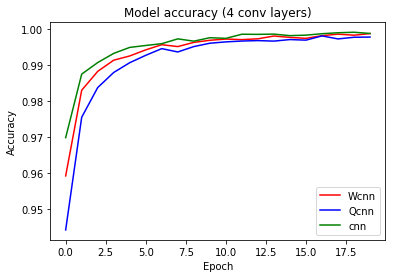

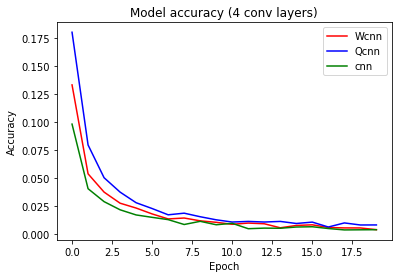

In [53]:
# Plot training accuracy values
plt.plot(history_wcnn_4c1p.history['acc'], color='red', label='Wcnn')
plt.plot(history_qcnn_4c1p.history['acc'], color='blue', label='Qcnn')
#plt.plot(history_q4cnn_4c1p.history['acc'], color='m', label='Q4cnn')
plt.plot(history_cnn_4c1p.history['acc'], color='green', label='cnn')
plt.title('Model accuracy (4 conv layers)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot training loss values
plt.plot(history_wcnn_4c1p.history['loss'], color='red', label='Wcnn')
plt.plot(history_qcnn_4c1p.history['loss'], color='blue', label='Qcnn')
#plt.plot(history_q4cnn_4c1p.history['loss'], color='m', label='Q4cnn')
plt.plot(history_cnn_4c1p.history['loss'], color='green', label='cnn')
plt.title('Model accuracy (4 conv layers)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()






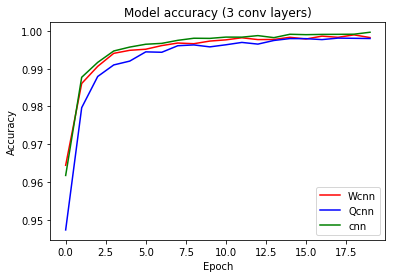

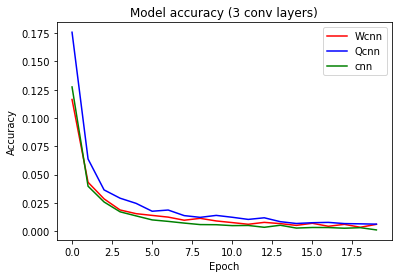

In [54]:
# Plot training accuracy values
plt.plot(history_wcnn_3c1p.history['acc'], color='red', label='Wcnn')
plt.plot(history_qcnn_3c1p.history['acc'], color='blue', label='Qcnn')
#plt.plot(history_q4cnn_3c1p.history['acc'], color='m', label='Q4cnn')
plt.plot(history_cnn_3c1p.history['acc'], color='green', label='cnn')
plt.title('Model accuracy (3 conv layers)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot training loss values
plt.plot(history_wcnn_3c1p.history['loss'], color='red', label='Wcnn')
plt.plot(history_qcnn_3c1p.history['loss'], color='blue', label='Qcnn')
#plt.plot(history_q4cnn_3c1p.history['loss'], color='m', label='Q4cnn')
plt.plot(history_cnn_3c1p.history['loss'], color='green', label='cnn')
plt.title('Model accuracy (3 conv layers)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()



